In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
data=pd.read_csv("https://drive.google.com/uc?export=download&id=13ZTYmL3E8S0nz-UKl4aaTZJaI3DVBGHM")
data.head(5)

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
data.tail(5)

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [7]:
null_percent=data.isna().sum()/data.shape[0]*100
null_percent

study_hours      2.5
student_marks    0.0
dtype: float64

In [8]:
data.study_hours=data.study_hours.fillna(data.study_hours.mean())

In [10]:
data.isna().any()

study_hours      False
student_marks    False
dtype: bool

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    200 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [13]:
data.describe()

,study_hours,student_marks
count,200.000000,200.00000
mean,6.995949,77.93375
std,1.237218,4.92570
min,5.010000,68.57000
25%,5.790000,73.38500
50%,7.002974,77.71000
75%,8.072500,82.32000
max,8.990000,86.99000


Text(0.5, 1.0, 'study hour VS student marks')

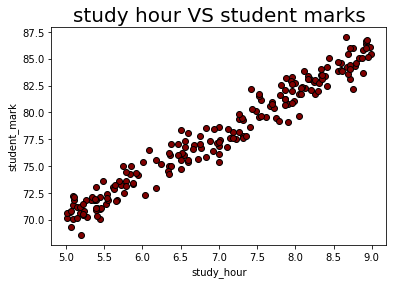

In [18]:
plt.scatter(x=data.study_hours,y=data.student_marks,c="maroon",edgecolors="black")
plt.xlabel("study_hour")
plt.ylabel("student_mark")
plt.title("study hour VS student marks",fontsize=20)

In [95]:
x=data.drop(["student_marks"],axis=1)
y=data.drop(["study_hours"],axis=1)

In [96]:
x.shape

(200, 1)

In [97]:
y.shape

(200, 1)

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (160, 1)
shape of y_train =  (160, 1)
shape of X_test =  (40, 1)
shape of y_test =  (40, 1)


In [99]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [100]:
lr.coef_

array([[3.93571802]])

In [101]:
lr.intercept_

array([50.44735504])

In [102]:
y_pred=lr.predict(X_test)

In [103]:
pd.DataFrame(np.c_[y_test,X_test,y_pred],columns=["study_hour","original_marks","predicted_marks"])

,study_hour,original_marks,predicted_marks
0,82.02,8.300000,83.113815
1,77.55,7.230000,78.902596
2,84.19,8.670000,84.570030
3,85.46,8.990000,85.829460
4,84.03,8.710000,84.727459
5,80.81,7.700000,80.752384
6,73.61,5.690000,72.841591
7,70.90,5.390000,71.660875
8,73.14,5.790000,73.235162
9,73.02,5.390000,71.660875


In [104]:
lr.score(X_test,y_test)

0.9514124242154464

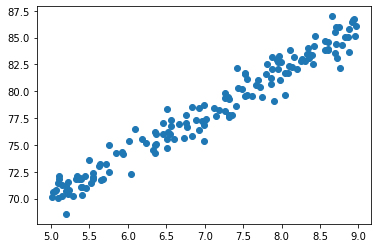

In [105]:
plt.scatter(X_train,y_train)

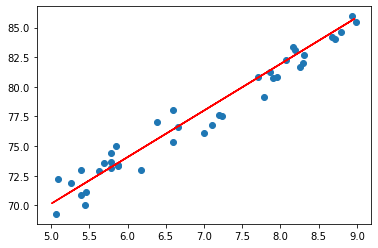

In [106]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),c="red")

In [107]:
import joblib
joblib.dump(lr, "student_mark_predictor.pkl")

['student_mark_predictor.pkl']

In [108]:
model = joblib.load("student_mark_predictor.pkl")

In [130]:
model.predict([[12]])[0][0]

97.67597123672232

In [132]:
import numpy as np
import pandas as pd
from flask import Flask, request, render_template
import joblib

app = Flask(__name__)

model = joblib.load("student_mark_predictor.pkl")

df = pd.DataFrame()

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict',methods=['POST'])
def predict():
    global df
    
    input_features = [int(x) for x in request.form.values()]
    features_value = np.array(input_features)
    
    #validate input hours
    if input_features[0] < 0 or input_features[0] > 24:
            return render_template('index.html', prediction_text='Please enter valid hours between 1 to 24 if you live on the Earth')
        

    output = model.predict([features_value])[0][0].round(2)

    # input and predicted value store in df then save in csv file
    df= pd.concat([df,pd.DataFrame({'Study Hours':input_features,'Predicted Output':[output]})],ignore_index=True)
    print(df)   
    df.to_csv('smp_data_from_app.csv')

    return render_template('index.html', prediction_text='You will get [{}%] marks, when you do study [{}] hours per day '.format(output, int(features_value[0])))


if __name__ == "__main__":
    debug=True
    app.run(host='0.0.0.0',port=8080)
    

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:8080/ (Press CTRL+C to quit)


In [137]:
pd.read_html("index.html")

ValueError: No tables found